### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading Dataset

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


### 3. Understanding Data

#### 3.1 Surface-Level Dataset Check

 - Shape and Size
 - Columns Overview
 - Data Types
 - High-Level Summary
 - Descriptive Statistics

##### 3.1.1 Shape is understood because if it is too big, then we can sample it out for intensive operations  

In [4]:
df.shape

(891, 12)

##### 3.1.2 Column overview to see if it is needed to rename columns to follow snake_cases (all lowercase with underscores in btw) or semantic naming if they are not already

In [5]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

###### Renaming Columns - 7 Methods

##### 3.1.2.1 Using Regular Expressions with re.sub() - Advanced Pattern Matching

In [6]:
import re

In [7]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_',col).lower() for col in df.columns]

##### 3.1.2.2 Using .rename Method (Selective Renaming)
df.rename(columns={'OldColumnName':'NewColumnName','a':'b'})

##### 3.1.2.3 Renaming All Columns Using a List
df.columns = ['column1','column2']

##### 3.1.2.4 Using .set_axis() (Renaming all the columns)
df.set_axis(['newname','new_name2'], axis=1, inplace=True) 

###### 3.1.2.5 Using List Comprehension with str.replace() (Custom renaming Logic)
df.columns = [col.replace(' ','_') for col in df.columns]

or 

df.columns = [custom_function(col) for col in dfcolumns]

##### 3.1.2.6 Using map() with a Dictionary (Custom Mapping)
df.columns = df.columns.map(lamba x: x.lower().replace(' ', '_')

##### 3.1.2.7 Using .add_prefix() or .add_suffix()
df = df.add_prefix('prefix_') ---- adds a string to the beginning of every column name
df = df.add_suffix('_suffix') ---- adds a string to the end of every column name

##### 3.1.3 Data Types to see if any object types are having/hiding numerical data

In [8]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
name             object
sex              object
age             float64
sib_sp            int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
dtype: object

Here, we can add Sibsp and Parch to create 1 new feature called 'family_size' inplace of these 2 features where the passenger themselves would also be included
- Helps prevent Multi-collinearity
- Reduces feature Redundancy

And we can also encode the categorical variables:
Sex, Pclass, Embarked

###### Creating New Feature

In [9]:
df['family_size'] = df['sib_sp'] + df['parch'] + 1

In [10]:
df.drop(['sib_sp', 'parch'], axis = 1, inplace = True)
# axis=0 ---- Down Rows
# axis=1 ---- Across Columns ----- Drop these columns not rows

In [11]:
df.head()

,passenger_id,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


##### 3.1.4 Summary to understand non-null counts, data typesm memory usage
Essential for spotting missing data before diving deep

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   ticket        891 non-null    object 
 7   fare          891 non-null    float64
 8   cabin         204 non-null    object 
 9   embarked      889 non-null    object 
 10  family_size   891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


##### 3.1.5 Descriptive Statistics to understand:
- Distribution (mean, std, min, ,max)
- Unique Counts (for categoricals)
- Most Frequent Values (for mode detection)
- % of nulls (indirectly)

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
passenger_id,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2 Null and NaN Analysis

In [14]:
df.isnull().sum().sort_values(ascending = False)

cabin           687
age             177
embarked          2
passenger_id      0
survived          0
pclass            0
name              0
sex               0
ticket            0
fare              0
family_size       0
dtype: int64

In [15]:
df.isnull().mean()*100 # Percentage of Null Values

passenger_id     0.000000
survived         0.000000
pclass           0.000000
name             0.000000
sex              0.000000
age             19.865320
ticket           0.000000
fare             0.000000
cabin           77.104377
embarked         0.224467
family_size      0.000000
dtype: float64

#### 3.3 Check for Duplicates

In [16]:
df.duplicated().sum()

0

#### 3.4 Uniqueness & Cardinality

In [17]:
for col in df.columns:
    print(col, df[col].nunique())

passenger_id 891
survived 2
pclass 3
name 891
sex 2
age 88
ticket 681
fare 248
cabin 147
embarked 3
family_size 9


### 4. Handling Null Values 

- Visual Inspection of Missing Data
- Missing Data Correlation
- Missingness vs Feature Distribution (for numerical features)
- Imputing Missing values Using Basic Methods (mean, median, mode)
- Impute Missing values using Predictive Modeling (KNN or Random Forest)
- Drop Columns with Excessive Missing Values
- Little's MCAR Test (if applicable) - Placeholder

##### 4.1 Visual Inspection of Missing Data
To understand missingness Pattern in each DataFrame

<function matplotlib.pyplot.show(close=None, block=None)>

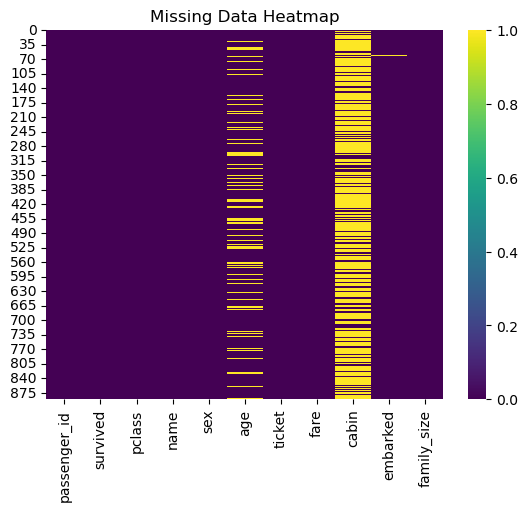

In [18]:
sns.heatmap(df.isnull(), cbar = True, cmap = 'viridis')
plt.title(f'Missing Data Heatmap')
plt.show

##### 4.2 Missing Data Correlation

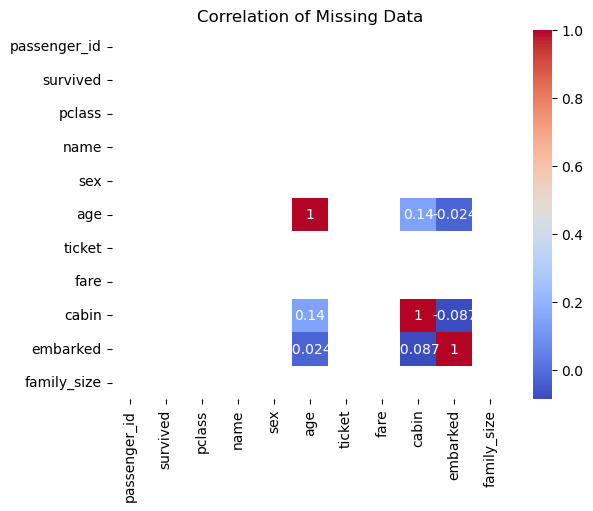

In [19]:
missing_corr = df.isnull().astype(int).corr()
sns.heatmap(missing_corr, cmap='coolwarm', annot=True)
plt.title('Correlation of Missing Data')
plt.show()

##### 4.3 Missingness vs Feature Distribution (for numerical features)

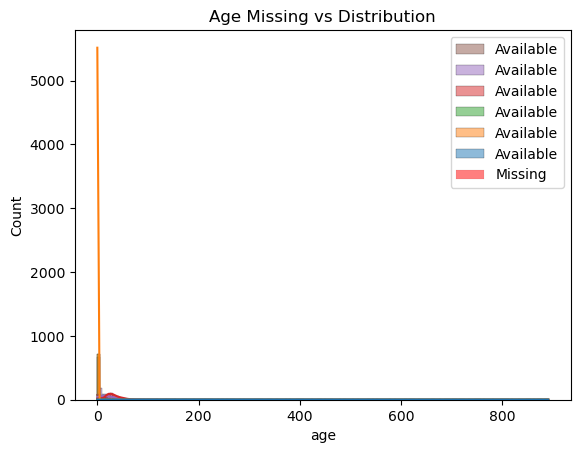

In [20]:
sns.histplot(df[df['age'].notnull()], color='blue', label='Available', kde=True)
sns.histplot(df[df['age'].isnull()]['age'], color='red', label='Missing', kde=True)
plt.legend()
plt.title( 'Age Missing vs Distribution')
plt.show()

##### 4.4 Imputing Missing values Using Basic Methods (mean, median, mode)

In [21]:
def basic_impute(df):
    
    df.drop(columns='cabin', inplace=True)
    
    # For numerical columns
    df['age'].fillna(df['age'].mean(), inplace = True)
    
    # For Categorical Columns
    df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
    return df

##### 4.5 Impute Missing values using Predictive Modeling (KNN or Random Forest)

In [22]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

In [23]:
def predictive_impute(df):
    
    
    # Example of KNN Imputer ---- Similarity based prediction
    
    knn_imputer = KNNImputer(n_neighbors=5)
    
    df[['age']] = knn_imputer.fit_transform(df[['age']])
    
    
    # Random Forest ---- Ensemble based regression/classification
    # Can be used for both numerical and categorical data
    
    rf_imputer = RandomForestRegressor(n_estimators=100, random_state=42)
    
    df['age'].fillna(df.groupby('pclass')['age'].transform('mean'), inplace=True)
    
    
    return df

##### Following all examples of predictice imputers, their usecases and caveats

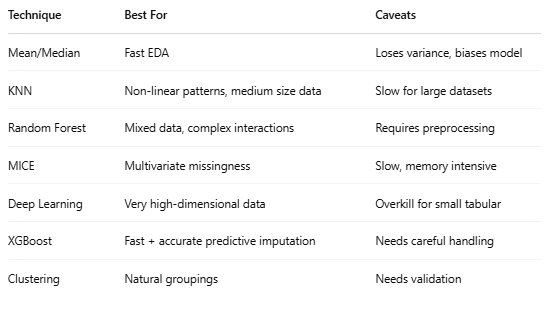

##### Applying the above two imputation steps to DataFrame

In [24]:
df1 = df.copy()
df2 = df.copy()

In [25]:
df1 = basic_impute(df1)

In [26]:
df1

,passenger_id,survived,pclass,name,sex,age,ticket,fare,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1


In [27]:
df2 = predictive_impute(df2)

In [28]:
df2.drop(columns='cabin', axis =1, inplace=True)

In [29]:
df2

,passenger_id,survived,pclass,name,sex,age,ticket,fare,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1


### 5. Converting Categorical Features into Numerical Features

- Label Encoding
- One-Hot Encoding
- Binary Encoding
- Ordinal Encoding
- Frequency Encoding
- Target Encoding
- Hashing Encoding
- Count Encoding

##### 5.1 Label Encoding

--> Good for ordinal [Categorical-With Order] variables or when you need unique integer labels

--> Converts each unique categorical value into a unique integer

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
def label_encoding(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

##### 5.2 One-Hot Encoding

 --> Creates separeate binary columns for each category of the original column
 
 --> Useful for nominal variables with no inherent order [Categorical - No order]

In [32]:
def one_hot_encoding(df,column):
    df = pd.get_dummies(df, columns = [column], drop_first=False)
    # drop_first=False to avoid Multi-collinearity
    return df

##### 5.3 Binary Encoding

--> Works well with high cardinality categories

--> Converts categories into binary code, then splits into columns

!pip install category_encoders

import category_encoders as ce

def binary_encoding(df, column):
    encoder = ce.BinaryEncoder(cols=[column])
    df = encoder.fit_transform(df)
    return df

##### 5.4 Ordinal Encoding

--> Perfect for ordered categories

--> Assigns numbers based on the order/rank of the categories

In [33]:
def ordinal_encoding(df, column, mapping):
    df[column] = df[column].map(mapping)
    return df

##### 5.5 Frequency Encoding

--> Replaces categories with how frequently they appear and applies normalization

--> Useful when categories have different frequencies and need a compact representation

In [34]:
def frequency_encoding(df, column):
    freq_map = df[column].value_counts() / len(df)
    df[column] = df[column].map(freq_map)
    return df

##### 5.6 Target Encoding (Mean Encoding)

--> Replaces categories with the mean of the target variable for each categpry

--> Best for improving model performance when there's a strong relationship with the target variable

In [35]:
def target_encoding(df, column, target):
    mean_encoded = df.groupby(column)[target].mean()
    df[column] = df[column].map(mean_encoded)
    return df

##### 5.7 Hashing Encoding (Hashing Trick)

--> Applies a hash function to categories to assign them into a fixed number of buckets 

--> Works well with high cardinality and can be used for text features

from sklearn.feature_extraction import FeatureHasher

def hashing_encoding(df, column, n_features):

    hasher = FeatureHasher(n_features=n_features, input_type='string')
    
    hashed_features = hasher.transform(df[column].astype(str))
    
    df_hashed = pd.DataFrame(hashed_features.toarray(), columns=[f'{column}_hashed_{i}' for i in range(n_features)])
    
    df = pd.concat([df, df_hashed], axis=1).drop(columns=[column])
    return df


##### 5.8 Count Encoding

--> Converts categories into number of times it appears in the data (very similar to fequency encoding, but without normalization)

--> Useful when you care about the frequency of categories

In [36]:
def count_encoding(df, column):
    count_map = df[column].value_counts()
    df[column] = df[column].map(count_map)
    return df

In [37]:
dff11 = df1.copy()
dff12 = df1.copy()

dff21 = df2.copy()
dff22 = df2.copy()

In [38]:
dff11 = one_hot_encoding(dff11, 'embarked')
dff11 = one_hot_encoding(dff11, 'sex')

In [39]:
dff12 = label_encoding(dff12, 'embarked')
dff12 = label_encoding(dff12, 'sex')

In [40]:
dff21 = one_hot_encoding(dff21, 'embarked')
dff21 = one_hot_encoding(dff21, 'sex')

In [41]:
dff22 = label_encoding(dff22, 'embarked')
dff22 = label_encoding(dff22, 'sex')

In [42]:
dff11.head(3)

,passenger_id,survived,pclass,name,age,ticket,fare,family_size,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,2,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,2,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,1,0


In [43]:
dff22.head(3)

,passenger_id,survived,pclass,name,sex,age,ticket,fare,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,2,1


In [44]:
df.head(3)

,passenger_id,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1


### 6. Normalization [Scales btw 0 and 1]

#### 6.1 Min-Max Normalization

--> Scales features linearly to a fixed range, usually between 0 and 1

In [45]:
from sklearn.preprocessing import MinMaxScaler

def normalize_minmax(df, columns):
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[columns] = scaler.fit_transform(df[columns])
    return df_normalized

#### 6.2 MaxAbs Normalization

--> Scales features by their maximum absolute value, preserving sparsity and sign

In [46]:
from sklearn.preprocessing import MaxAbsScaler

def normalize_maxabs(df, columns):
    scaler = MaxAbsScaler()
    df_normalized = df.copy()
    df_normalized[columns] = scaler.fit_transform(df[columns])
    return df_normalized

#### 6.3 Quantile Normalization (Uniform)

--> Transforms features to follow a uniform distribution using quantile information

In [47]:
from sklearn.preprocessing import QuantileTransformer

def normalize_quantile_uniform(df, columns):
    transformer = QuantileTransformer(output_distribution='uniform')
    df_normalized = df.copy()
    df_normalized[columns] = transformer.fit_transform(df[columns])
    return df_normalized

### 7. Standardization Functions (center to mean = 0, std = 1)

#### 7.1 Z-Score Standardization

--> Centers features around mean 0 and scales them based on standard deviation

In [48]:
from sklearn.preprocessing import StandardScaler

def standardize_zscore(df, columns):
    scaler = StandardScaler()
    df_standardized = df.copy()
    df_standardized[columns] = scaler.fit_transform(df[columns])
    return df_standardized

#### 7.2 Robust Standardization (with medeian and IQR)

--> Uses median and interquartile range to scale features, robust to outliers

In [49]:
from sklearn.preprocessing import RobustScaler

def standardize_robust(df, columns):
    scaler = RobustScaler()
    df_standardized = df.copy()
    df_standardized[columns] = scaler.fit_transform(df[columns])
    return df_standardized

#### 7.3 Power Transformation (Yeo-Johnson)

--> Applies a non-linear transformation to make data more Gaussian-like

In [50]:
from sklearn.preprocessing import PowerTransformer

def standardize_power(df, columns):
    transformer = PowerTransformer(method='yeo-johnson')
    df_standardized = df.copy()
    df_standardized[columns] = transformer.fit_transform(df[columns])
    return df_standardized

In [51]:
columns = ['age', 'fare', 'family_size']
dff11_standardized = standardize_zscore(dff11, columns)

### 8. Outlier Handling 

#### 8.1 Statistical Methods
- Box Plot (IQR Method)
- Z-score Method
- Modified Z-score Method

#### 8.2 Visualization Methods
- Box Plot
- Violin Plot 
- Scatter Plot

#### 8.3 Machine Learning Based Methods
- Isolation Forest
- Local Outlier Factor (LOF)
- DBSCAN Clustering (Density-based)

#### 8.4 Handling Outliers
- Remove them
- Cap them (Winsorization)
- Replace them with Median or Mean)

#### 8.1 Statistical Methods

#### 8.1.1 Box Plot (IQR Method)

- Uses the IQR to detect values that are too far from the middle 50% of the data

In [52]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

#### 8.1.2 Z-score Method

- Measures how many standard deviations a value is from the mean

In [53]:
from scipy.stats import zscore

def detect_outliers_z(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[(abs(z_scores) > threshold)]

#### 8.1.3 Modified Z-score Method

- A robust alternative to z-score using median and MAD (Mean Absolute Deviation)

In [54]:
import numpy as np

def detect_outliers_modified_z(df, column, threshold=3.5):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    modified_z = 0.6745 * (df[column] - median) / mad
    return df[modified_z.abs() > threshold]

#### 8.2 Visualization Methods

#### 8.2.1 Box Plot

- Shows Q1, Q3, median, and Outliers as points outside whiskers

Text(0.5, 1.0, 'Boxplot - Age')

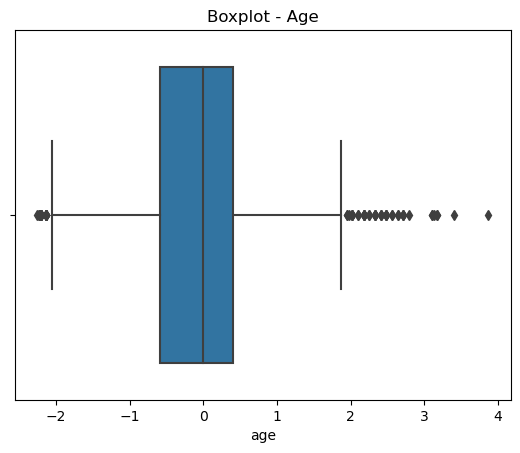

In [55]:
sns.boxplot(x=dff11_standardized['age'])
plt.title('Boxplot - Age')

#### 8.2.2 Violin Plot

- Combines a box plot + KDE (Distribution shape)

<Axes: xlabel='fare'>

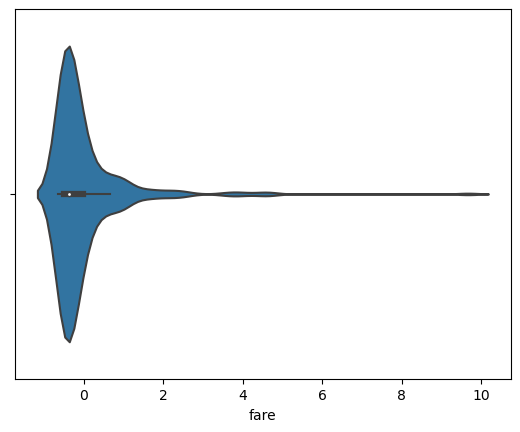

In [56]:
sns.violinplot(x=dff11_standardized['fare'])

#### 8.2.3 Scatter Plot (for multivariate)

- Plots two variables to identify extremw values or patterns 

<Axes: xlabel='age', ylabel='fare'>

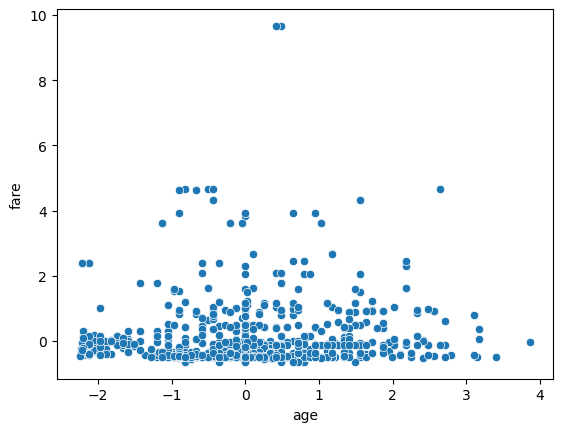

In [57]:
sns.scatterplot(x='age', y='fare', data=dff11_standardized)

#### 8.3 Machine Learning Based Methods¶

#### 8.3.1 Isolation Forest (Best for large datasets)

- Randomly Splits data, outliers get isolated faster

- Here, contamination is the expected proportion of outliers in the dataset
- It tells the model how many points it should consider as anomalies

- The model assigns anomaly scores to all points
- Then it selects the top N% (based on scores) as outliers, where N=Contamination=5%

In [58]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(df, features):
    model = IsolationForest(contamination=0.05)
    df['anomaly'] = model.fit_predict(df[features])
    return df[df['anomaly'] == -1]

#### 8.3.2 Local Outlier Factor (LOF)

- Compares the local density of a point to its neighbors

In [59]:
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers_lof(df, features):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    df['anomaly'] = lof.fit_predict(df[features])
    return df[df['anomaly'] == -1]

#### 8.3.3 DBSCAN Clustering (Density-based)

- Groups dense areas, anything not belonging to any cluster is an outlier

- Here, 'eps' is epsilon: It's the maximum distance between two points for them to be considered as neighbors

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def detect_outliers_dbscan(df, features):
    scaled = StandardScaler().fit_transform(df[features])
    db = DBSCAN(eps=0.5, min_samples=5).fit(scaled)
    df['cluster'] = db.labels_
    return df[df['cluster'] == -1]

#### 8.4 Handling Outliers

#### 8.4.2 Cap Them (Winsorization)

- Replace extreme values with a threshold (e.g., 1st/99th percentile)

In [61]:
from scipy.stats.mstats import winsorize

def cap_outliers_winsorize(df, column, limits=(0.05, 0.05)):
    df[column] = winsorize(df[column], limits=limits)
    return df

#### 8.4.3 Replace with Median or Mean

- Replace outliers with more central values

In [62]:
def replace_outliers_with_median(df, column):
    outliers = detect_outliers_iqr(df, column)
    median = df[column].median()
    df.loc[outliers.index, column] = median
    return df

In [63]:
# Drop outliers from specific numeric columns
dff11 = detect_outliers_iqr(dff11, 'age')
dff11 = detect_outliers_iqr(dff11, 'fare')
dff11 = detect_outliers_iqr(dff11, 'family_size')